Epoch 1/10


c:\Users\bjolnir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9308 - loss: 0.9076 - val_accuracy: 0.3333 - val_loss: 0.9332
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9595 - loss: 0.5586 - val_accuracy: 0.9020 - val_loss: 0.6123
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9919 - loss: 0.2960 - val_accuracy: 0.9804 - val_loss: 0.3733
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1773 - val_accuracy: 1.0000 - val_loss: 0.1756
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1165 - val_accuracy: 1.0000 - val_loss: 0.1198
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9986 - loss: 0.0665 - val_accuracy: 1.0000 - val_loss: 0.0796
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0439 - val_accuracy: 1.0000 - val_loss: 0.0586
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 0.0534


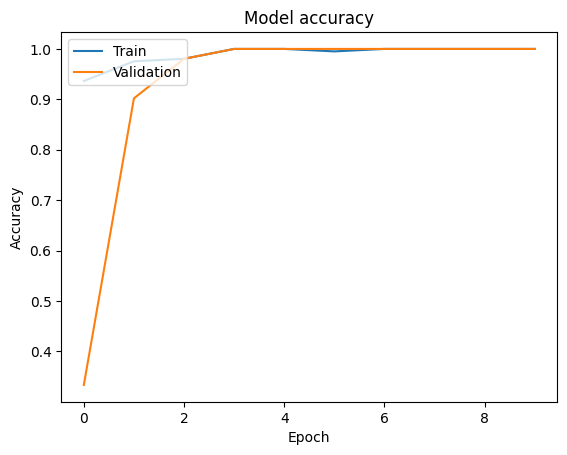

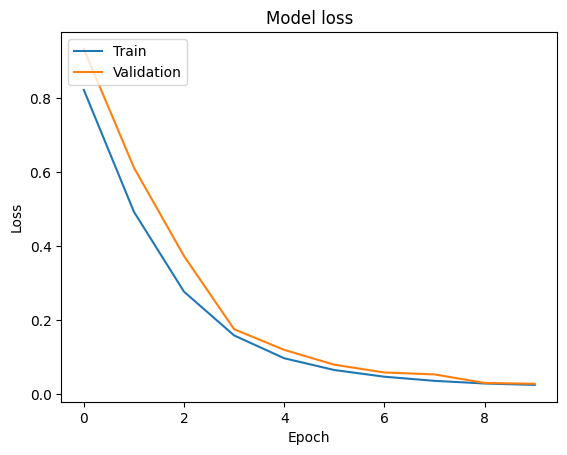

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

      matang       0.89      1.00      0.94        50
     mengkal       0.94      0.88      0.91        50
      mentah       1.00      0.94      0.97        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



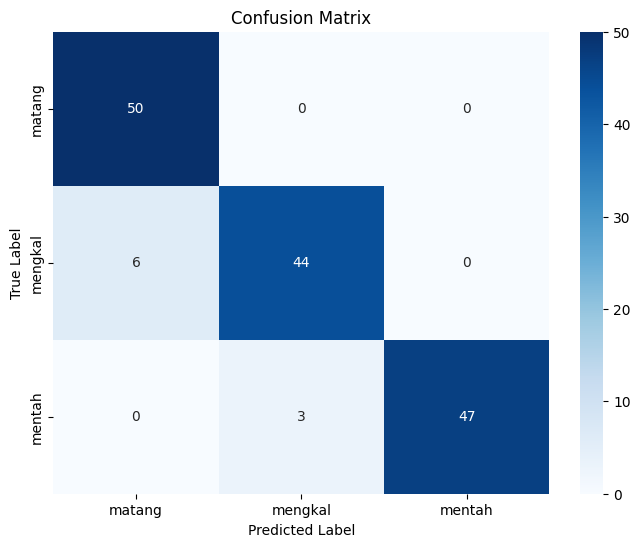

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Memuat data fitur warna RGB untuk pelatihan
train_data = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_RGB.csv')

# Memuat data fitur warna RGB untuk pengujian
test_data = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_RGB.csv')

# Memisahkan fitur dan label untuk pelatihan
X_train = train_data[['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']]
y_train = train_data['Class']

# Memisahkan fitur dan label untuk pengujian
X_test = test_data[['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']]
y_test = test_data['Class']

# Mengencode label kelas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model ANN
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Mengompilasi model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=10, validation_split=0.2)

# Mengevaluasi model dengan data uji
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Accuracy: {accuracy*100:.2f}%')

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prediksi label untuk data uji
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan classification report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [31]:
import pandas as pd

# Memuat data latih dan data uji
train_data = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_RGB.csv')
test_data = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_RGB.csv')

# Distribusi kelas pada data latih
print("Distribusi Kelas pada Data Latih")
print(train_data['Class'].value_counts())

# Distribusi kelas pada data uji
print("\nDistribusi Kelas pada Data Uji")
print(test_data['Class'].value_counts())


Distribusi Kelas pada Data Latih
Class
matang     85
mengkal    85
mentah     85
Name: count, dtype: int64

Distribusi Kelas pada Data Uji
Class
matang     50
mengkal    50
mentah     50
Name: count, dtype: int64


In [32]:
# Menampilkan beberapa baris dari data latih
print("Data Latih")
print(train_data.head())

# Menampilkan beberapa baris dari data uji
print("\nData Uji")
print(test_data.head())


Data Latih
  Image Name   Class     Mean_R     Mean_G     Mean_B      Std_R      Std_G  \
0   r(1).jpg  matang  15.316237  19.308956  41.410412  28.444011  35.830664   
1  r(10).jpg  matang  11.120463  15.410069  40.269725  27.744557  34.072380   
2  r(11).jpg  matang  10.349000  14.580781  31.282944  27.765285  33.774620   
3  r(12).jpg  matang   9.410194  13.308988  32.663013  24.872883  31.001809   
4  r(13).jpg  matang  11.550375  16.722325  39.994925  28.843675  35.343954   

       Std_B  
0  70.372774  
1  69.297282  
2  60.750721  
3  62.451732  
4  69.885352  

Data Uji
     Image Name   Class    Mean_R    Mean_G     Mean_B      Std_R      Std_G  \
0  r (1222).jpg  matang  6.336219  9.667162  22.695038  18.248800  27.671861   
1  r (1223).jpg  matang  6.669537  7.382794  22.852406  18.595102  20.773193   
2  r (1226).jpg  matang  5.963038  9.022737  23.198950  17.069148  25.435343   
3  r (1228).jpg  matang  6.759050  9.510844  23.948319  18.738868  26.554708   
4  r (1230).jp

c:\Users\bjolnir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4840 - loss: 1.0637 - val_accuracy: 0.5098 - val_loss: 1.0552
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.6599 - val_accuracy: 0.5294 - val_loss: 0.7239
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9302 - loss: 0.3648 - val_accuracy: 0.8824 - val_loss: 0.4794
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9635 - loss: 0.2238 - val_accuracy: 0.9804 - val_loss: 0.2916
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.1430 - val_accuracy: 1.0000 - val_loss: 0.1790
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0861 - val_accuracy: 1.0000 - val_loss: 0.1116
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0702 - val_accuracy: 1.0000 - val_loss: 0.0990
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0562 - val_accuracy: 1.0000 - val_loss

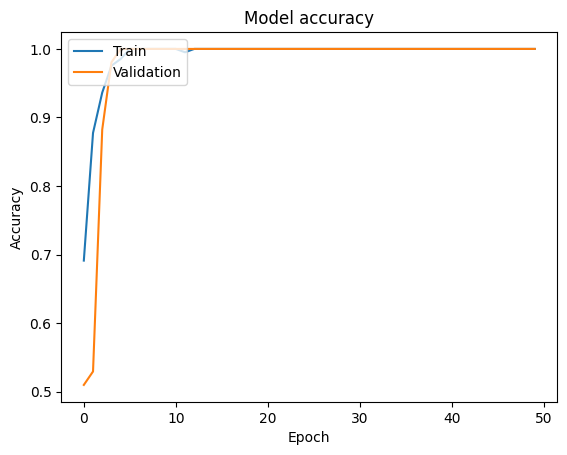

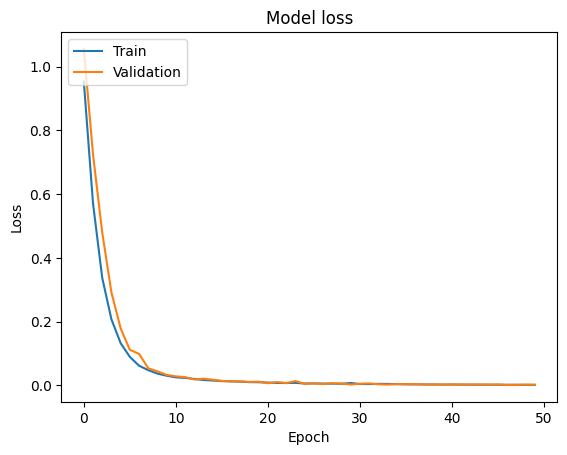

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

      matang       0.96      1.00      0.98        50
     mengkal       0.94      0.96      0.95        50
      mentah       1.00      0.94      0.97        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



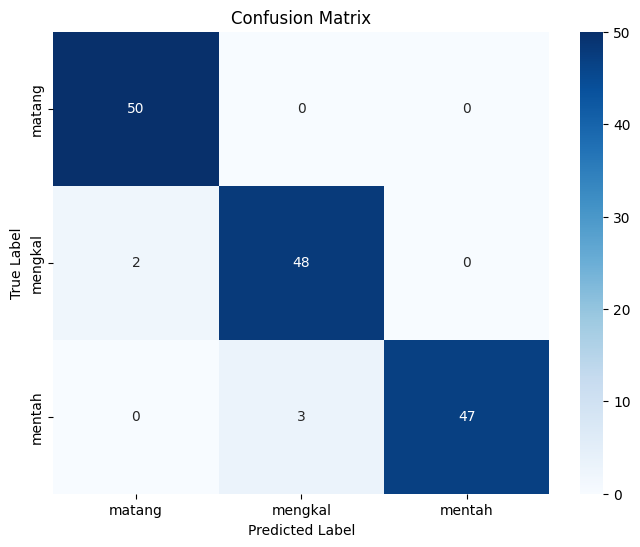

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data fitur warna RGB untuk pelatihan
train_data = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_RGB.csv')

# Memuat data fitur warna RGB untuk pengujian
test_data = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_RGB.csv')

# Memisahkan fitur dan label untuk pelatihan
X_train = train_data[['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']]
y_train = train_data['Class']

# Memisahkan fitur dan label untuk pengujian
X_test = test_data[['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']]
y_test = test_data['Class']

# Mengencode label kelas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model ANN
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Mengompilasi model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, validation_split=0.2)

# Mengevaluasi model dengan data uji
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Accuracy: {accuracy*100:.2f}%')

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prediksi label untuk data uji
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan classification report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
